 #  A Whale off the Port(folio)
 ---

 In this assignment, you'll get to use what you've learned this week to evaluate the performance among various algorithmic, hedge, and mutual fund portfolios and compare them against the S&P 500 Index.

In [322]:
# Initial imports
import pandas as pd
import numpy as np
import datetime as dt
from pathlib import Path
import seaborn as sns

%matplotlib inline

# Data Cleaning

In this section, you will need to read the CSV files into DataFrames and perform any necessary data cleaning steps. After cleaning, combine all DataFrames into a single DataFrame.

Files:

* `whale_returns.csv`: Contains returns of some famous "whale" investors' portfolios.

* `algo_returns.csv`: Contains returns from the in-house trading algorithms from Harold's company.

* `sp500_history.csv`: Contains historical closing prices of the S&P 500 Index.

## Whale Returns

Read the Whale Portfolio daily returns and clean the data

In [227]:
# Reading whale returns
whale_returns = Path("./Resources/whale_returns.csv")
df_whale = pd.read_csv(whale_returns,index_col='Date',parse_dates=True,infer_datetime_format=True)
df_whale.head()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC
Date,,,,
2015-03-02,NaN,NaN,NaN,NaN
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569
2015-03-04,0.002230,0.003241,-0.002534,0.004213
2015-03-05,0.004016,0.004076,0.002355,0.006726
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098


In [43]:
# Count nulls
df_whale.isnull().sum()

SOROS FUND MANAGEMENT LLC      1
PAULSON & CO.INC.              1
TIGER GLOBAL MANAGEMENT LLC    1
BERKSHIRE HATHAWAY INC         1
dtype: int64

In [44]:
# Drop nulls
df_whale = df_whale.dropna()
# Check again to see if all nulls are gone
df_whale.isnull().sum()

SOROS FUND MANAGEMENT LLC      0
PAULSON & CO.INC.              0
TIGER GLOBAL MANAGEMENT LLC    0
BERKSHIRE HATHAWAY INC         0
dtype: int64

## Algorithmic Daily Returns

Read the algorithmic daily returns and clean the data

In [228]:
# Reading algorithmic returns
algorithmic_returns = Path('./Resources/algo_returns.csv')
df_algo = pd.read_csv(algorithmic_returns,index_col='Date',parse_dates=True,infer_datetime_format=True)
df_algo.head()

,Algo 1,Algo 2
Date,,
2014-05-28,0.001745,NaN
2014-05-29,0.003978,NaN
2014-05-30,0.004464,NaN
2014-06-02,0.005692,NaN
2014-06-03,0.005292,NaN


In [46]:
# Count nulls
df_algo.isnull().sum()

Algo 1    0
Algo 2    6
dtype: int64

In [47]:
# Drop nulls
df_algo = df_algo.dropna()
# Check again to see if all nulls are gone
df_algo.isnull().sum()

Algo 1    0
Algo 2    0
dtype: int64

## S&P 500 Returns

Read the S&P 500 historic closing prices and create a new daily returns DataFrame from the data. 

In [229]:
# Reading S&P 500 Closing Prices
sp500_closing = Path('./Resources/sp500_history.csv')
df_sp500 = pd.read_csv(sp500_closing,index_col='Date',parse_dates=True,infer_datetime_format=True)
df_sp500.head()

,Close
Date,
2019-04-23,$2933.68
2019-04-22,$2907.97
2019-04-18,$2905.03
2019-04-17,$2900.45
2019-04-16,$2907.06


In [230]:
# Check Data Types
print (df_whale.dtypes)
print (df_algo.dtypes)
print (df_sp500.dtypes)

SOROS FUND MANAGEMENT LLC      float64
PAULSON & CO.INC.              float64
TIGER GLOBAL MANAGEMENT LLC    float64
BERKSHIRE HATHAWAY INC         float64
dtype: object
Algo 1    float64
Algo 2    float64
dtype: object
Close    object
dtype: object


In [50]:
# Fix Data Types
df_sp500['Close'] = df_sp500['Close'].str.replace("$","")
df_sp500['Close'] = df_sp500['Close'].astype(float)
df_sp500.tail()

,Close
Date,
2012-10-05,1460.93
2012-10-04,1461.40
2012-10-03,1450.99
2012-10-02,1445.75
2012-10-01,1444.49


In [231]:
#sort SP500 from old to new, so you have correct values
df_sp500 = df_sp500.sort_values("Date",ascending=True)
df_sp500.head()

,Close
Date,
2012-10-01,$1444.49
2012-10-02,$1445.75
2012-10-03,$1450.99
2012-10-04,$1461.40
2012-10-05,$1460.93


In [52]:
# Calculate Daily Returns
df_sp500_return = df_sp500.pct_change()
df_sp500_return

,Close
Date,
2012-10-01,NaN
2012-10-02,0.000872
2012-10-03,0.003624
2012-10-04,0.007174
2012-10-05,-0.000322
...,...
2019-04-16,0.000509
2019-04-17,-0.002274
2019-04-18,0.001579


In [53]:
# Drop nulls
df_sp500_return.dropna()
df_sp500_return

,Close
Date,
2012-10-01,NaN
2012-10-02,0.000872
2012-10-03,0.003624
2012-10-04,0.007174
2012-10-05,-0.000322
...,...
2019-04-16,0.000509
2019-04-17,-0.002274
2019-04-18,0.001579


In [54]:
# Rename `Close` Column to be specific to this portfolio.

df_sp500_return.columns = ["sp500_returns"]
df_sp500_return

,sp500_returns
Date,
2012-10-01,NaN
2012-10-02,0.000872
2012-10-03,0.003624
2012-10-04,0.007174
2012-10-05,-0.000322
...,...
2019-04-16,0.000509
2019-04-17,-0.002274
2019-04-18,0.001579


## Combine Whale, Algorithmic, and S&P 500 Returns

In [55]:
# Join Whale Returns, Algorithmic Returns, and the S&P 500 Returns into a single DataFrame with columns for each portfolio's returns.
df_combined_daily = pd.concat([df_whale,df_algo,df_sp500_return],axis='columns',join='inner')
df_combined_daily

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,sp500_returns
Date,,,,,,,
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569,-0.001942,-0.000949,-0.004539
2015-03-04,0.002230,0.003241,-0.002534,0.004213,-0.008589,0.002416,-0.004389
2015-03-05,0.004016,0.004076,0.002355,0.006726,-0.000955,0.004323,0.001196
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098,-0.004957,-0.011460,-0.014174
2015-03-09,0.000582,0.004225,0.005843,-0.001652,-0.005447,0.001303,0.003944
...,...,...,...,...,...,...,...
2019-04-16,0.002699,0.000388,-0.000831,0.000837,-0.006945,0.002899,0.000509
2019-04-17,-0.002897,-0.006467,-0.004409,0.003222,-0.010301,-0.005228,-0.002274
2019-04-18,0.001448,0.001222,0.000582,0.001916,-0.000588,-0.001229,0.001579


# Conduct Quantitative Analysis

In this section, you will calculate and visualize performance and risk metrics for the portfolios.

## Performance Anlysis

#### Calculate and Plot the daily returns.

<AxesSubplot:xlabel='Date'>

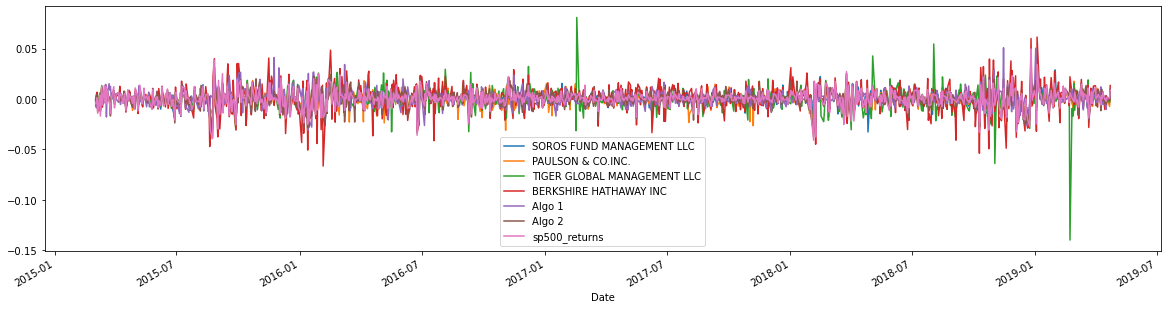

In [56]:
# Plot daily returns of all portfolios

df_combined_daily.plot(figsize=(20,5))

#### Calculate and Plot cumulative returns.

In [392]:
# Calculate cumulative returns of all portfolios

df_cumulative_returns = (1 + df_combined_daily).cumprod() - 1
df_cumulative_returns.tail(1)

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,sp500_returns
Date,,,,,,,
2019-04-23,0.050578,0.022269,-0.223278,0.008541,0.280907,0.001441,0.075506


<AxesSubplot:xlabel='Date'>

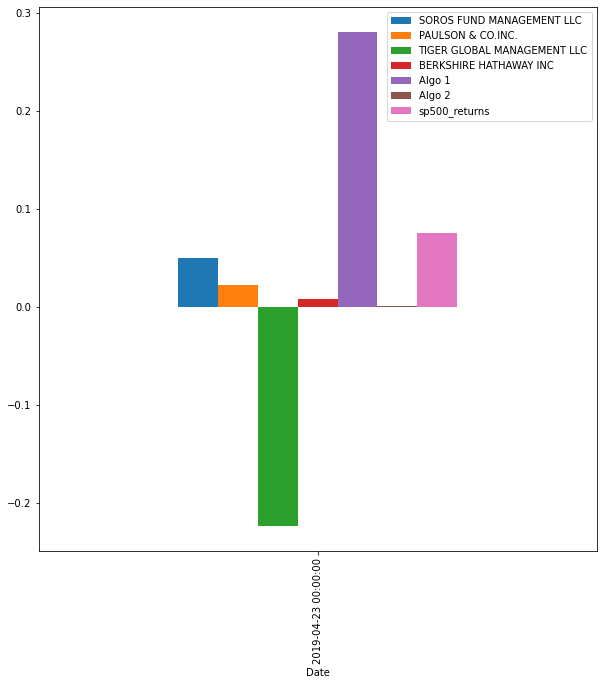

In [394]:
# Plot cumulative returns
df_cumulative_returns.tail(1).plot(kind="bar",figsize=(10,10))

---

## Risk Analysis

Determine the _risk_ of each portfolio:

1. Create a box plot for each portfolio. 
2. Calculate the standard deviation for all portfolios
4. Determine which portfolios are riskier than the S&P 500
5. Calculate the Annualized Standard Deviation

### Create a box plot for each portfolio


<AxesSubplot:>

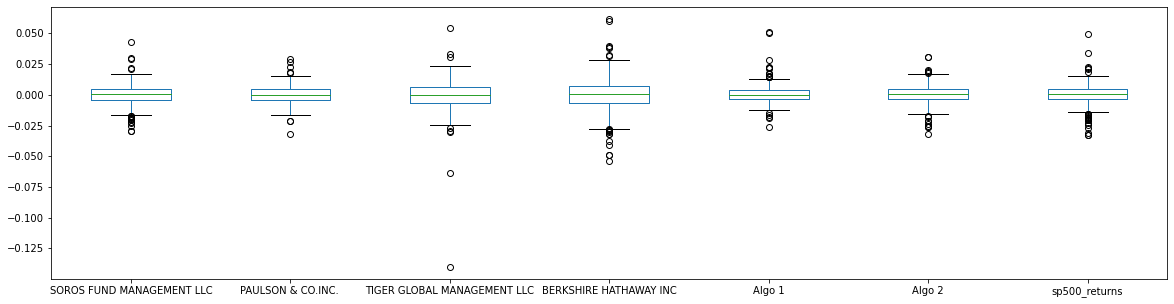

In [240]:
# Box plot to visually show risk
df_combined_daily.boxplot(grid=False,figsize=(20,5))

### Calculate Standard Deviations

In [312]:
# Calculate the daily standard deviations of all portfolios
df_std_dev = df_combined_daily.std()
df_daily_std = pd.DataFrame(df_std_dev)
df_daily_std.columns = ["std_dev"]
df_daily_std

,std_dev
SOROS FUND MANAGEMENT LLC,0.009240
PAULSON & CO.INC.,0.007353
TIGER GLOBAL MANAGEMENT LLC,0.014648
BERKSHIRE HATHAWAY INC,0.015569
Algo 1,0.008423
Algo 2,0.008791
sp500_returns,0.009578


### Determine which portfolios are riskier than the S&P 500

In [313]:
# Calculate the daily standard deviation of S&P 500
sp500_stddev = df_daily_std.iloc[-1]
sp500_stddev = pd.DataFrame(sp500_stddev)
sp500_stddev = sp500_stddev.transpose()
sp500_stddev

,std_dev
sp500_returns,0.009578


In [314]:
# Display the S&P500 std dev
sp500_stddev['std_dev']

sp500_returns    0.009578
Name: std_dev, dtype: float64

In [315]:
# Display all std dev
df_daily_std['std_dev']

SOROS FUND MANAGEMENT LLC      0.009240
PAULSON & CO.INC.              0.007353
TIGER GLOBAL MANAGEMENT LLC    0.014648
BERKSHIRE HATHAWAY INC         0.015569
Algo 1                         0.008423
Algo 2                         0.008791
sp500_returns                  0.009578
Name: std_dev, dtype: float64

In [ ]:
# Determine which portfolios are riskier than the S&P 500

# Create a comparison function
def risky_comparison(general_portfolio, sp500):
    if general_portfolio >= sp500:
        return general_portfolio

print("The following portfolios are riskier than the S&P500", risky_comparison(df_daily_std['std_dev'], sp500_stddev['std_dev']))

# Error - Can only compare identically-labeled Series objects, series look to be identically labeled 

### Calculate the Annualized Standard Deviation

In [257]:
# Calculate the annualized standard deviation (252 trading days)
annualized_std_dev = daily_std * np.sqrt(252)
annualized_std_dev

SOROS FUND MANAGEMENT LLC      0.146675
PAULSON & CO.INC.              0.116732
TIGER GLOBAL MANAGEMENT LLC    0.232531
BERKSHIRE HATHAWAY INC         0.247155
Algo 1                         0.133704
Algo 2                         0.139556
sp500_returns                  0.152054
dtype: float64

---

## Rolling Statistics

Risk changes over time. Analyze the rolling statistics for Risk and Beta. 

1. Calculate and plot the rolling standard deviation for the S&P 500 using a 21-day window
2. Calculate the correlation between each stock to determine which portfolios may mimick the S&P 500
3. Choose one portfolio, then calculate and plot the 60-day rolling beta between it and the S&P 500

### Calculate and plot rolling `std` for all portfolios with 21-day window

<AxesSubplot:>

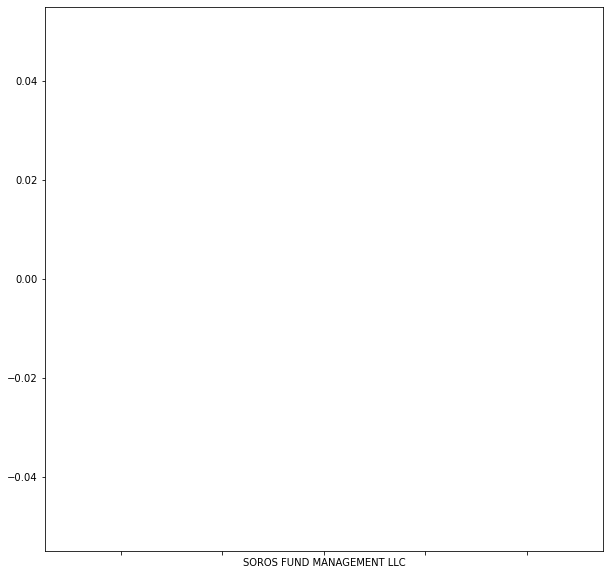

In [316]:
# Calculate the rolling standard deviation for all portfolios using a 21-day window

df_rolling = df_std_dev.rolling(window=21).mean()

# Plot the rolling standard deviation
df_rolling.plot(figsize=(10,10))

# ERROR - std dev's are not appearing 

### Calculate and plot the correlation

<AxesSubplot:>

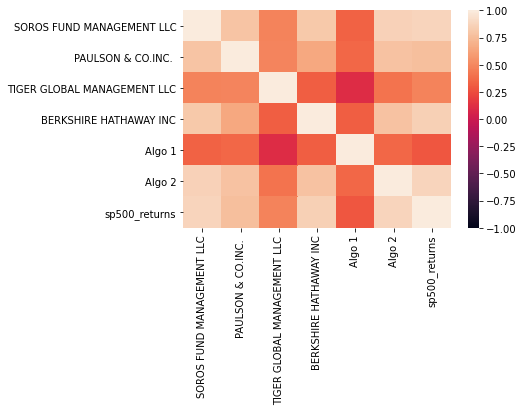

In [324]:
# Calculate the correlation
correlation = df_combined_daily.corr()

# Display de correlation matrix
sns.heatmap(correlation, vmin=-1, vmax=1)

### Calculate and Plot Beta for a chosen portfolio and the S&P 500

In [347]:
# Calculate covariance of a single portfolio

cov_algo1 = df_combined_daily['Algo 1'].cov(df_combined_daily['sp500_returns'])
print(f"The covariance of Algo 1 vs S&P 500 is {cov_algo1}, this implies that both portfolio's move in the same direction")

The covariance of Algo 1 vs S&P 500 is 2.3344034698704805e-05, this implies that both portfolio's move in the same direction


In [348]:
# Calculate variance of S&P 500
variance = df_combined_daily['sp500_returns'].var()
print(f"The variance of the S&P 500 is {variance}, this measures how far a set of numbers is spread out from their average value")

The variance of the S&P 500 is 9.17475896298873e-05, this measures how far a set of numbers is spread out from their average value


In [352]:
# Computing beta of Algo1
Algo1_beta = cov_algo1 / variance
Algo1_beta

print(f"The beta of the Algo1 portfolio compared to S&P500 is {Algo1_beta}, which implies Algo1 increased by {Algo1_beta} compared to the S&P500" )

The beta of the Algo1 portfolio compared to S&P500 is 0.25443758024461877, which implies Algo1 increased by 0.25443758024461877 compared to the S&P500


<AxesSubplot:title={'center':'Rolling Beta of Algo1 vs S&P500'}, xlabel='Date'>

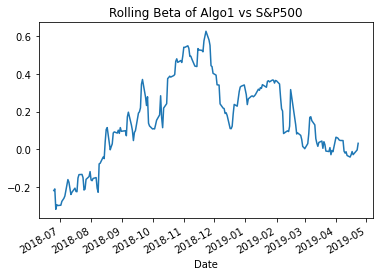

In [358]:
# Plot beta trend
rolling_covariance = df_combined_daily['Algo 1'].rolling(window=30).cov(df_combined_daily['sp500_returns'])
rolling_variance = df_combined_daily['sp500_returns'].rolling(window=30).var()
rolling_beta = rolling_covariance / rolling_variance
rolling_beta.plot(title ='Rolling Beta of Algo1 vs S&P500')

## Rolling Statistics Challenge: Exponentially Weighted Average 

An alternative way to calculate a rolling window is to take the exponentially weighted moving average. This is like a moving window average, but it assigns greater importance to more recent observations. Try calculating the [`ewm`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.ewm.html) with a 21-day half-life.

In [370]:
# Use `ewm` to calculate the rolling window
df_combined_daily.ewm(halflife='21').mean()

ValueError: halflife can only be a timedelta convertible argument if times is not None.

---

# Sharpe Ratios
In reality, investment managers and thier institutional investors look at the ratio of return-to-risk, and not just returns alone. After all, if you could invest in one of two portfolios, and each offered the same 10% return, yet one offered lower risk, you'd take that one, right?

### Using the daily returns, calculate and visualize the Sharpe ratios using a bar plot

In [372]:
df_combined_daily.head()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,sp500_returns
Date,,,,,,,
2018-05-14,0.000000,0.000000,0.000000,0.000000,0.000915,0.001635,0.000884
2018-05-15,-0.000726,-0.001409,-0.003189,-0.014606,-0.001135,-0.001139,-0.006842
2018-05-16,0.008637,0.006244,0.005480,0.004310,-0.002326,0.003341,0.004061
2018-05-17,-0.001955,0.002524,-0.006267,-0.005140,-0.006949,0.005205,-0.000856
2018-05-18,-0.004357,-0.002672,-0.012832,-0.002212,0.002557,-0.002496,-0.002632


In [377]:
# Annualized Sharpe Ratios

annual_sharpe= (df_combined_daily.mean() * 252) / (df_combined_daily.std() * np.sqrt(252))
annual_sharpe

SOROS FUND MANAGEMENT LLC      0.430713
PAULSON & CO.INC.              0.258738
TIGER GLOBAL MANAGEMENT LLC   -1.034216
BERKSHIRE HATHAWAY INC         0.159756
Algo 1                         2.035665
Algo 2                         0.080607
sp500_returns                  0.584820
dtype: float64

<AxesSubplot:>

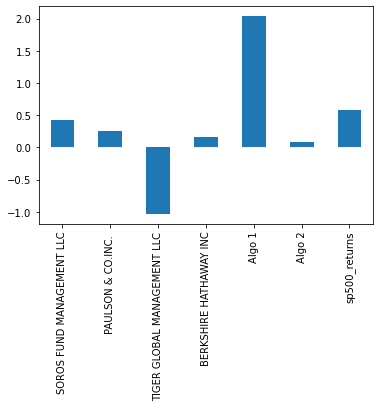

In [381]:
# Visualize the sharpe ratios as a bar plot
annual_sharpe.plot(kind="bar")

### Determine whether the algorithmic strategies outperform both the market (S&P 500) and the whales portfolios.

None of the whales have outperformed the S&P500, from the algoritmic portfolios only Algo1 managed to outperform the S&P500. 


---

# Create Custom Portfolio

In this section, you will build your own portfolio of stocks, calculate the returns, and compare the results to the Whale Portfolios and the S&P 500. 

1. Choose 3-5 custom stocks with at last 1 year's worth of historic prices and create a DataFrame of the closing prices and dates for each stock.
2. Calculate the weighted returns for the portfolio assuming an equal number of shares for each stock
3. Join your portfolio returns to the DataFrame that contains all of the portfolio returns
4. Re-run the performance and risk analysis with your portfolio to see how it compares to the others
5. Include correlation analysis to determine which stocks (if any) are correlated

## Choose 3-5 custom stocks with at last 1 year's worth of historic prices and create a DataFrame of the closing prices and dates for each stock.

For this demo solution, we fetch data from three companies listes in the S&P 500 index.

* `GOOG` - [Google, LLC](https://en.wikipedia.org/wiki/Google)

* `AAPL` - [Apple Inc.](https://en.wikipedia.org/wiki/Apple_Inc.)

* `COST` - [Costco Wholesale Corporation](https://en.wikipedia.org/wiki/Costco)

In [396]:
# Reading data from 1st stock
goog = Path("./Resources/goog_historical.csv")
df_goog = pd.read_csv(goog, index_col='Trade DATE', parse_dates = True, infer_datetime_format=True)
df_goog = df_goog.drop(columns=['Symbol'])
df_goog.columns = ["GOOG"]

In [397]:
# Reading data from 2nd stock
aapl = Path("./Resources/aapl_historical.csv")
df_aapl = pd.read_csv(aapl, index_col='Trade DATE', parse_dates = True, infer_datetime_format=True)
df_aapl = df_aapl.drop(columns=['Symbol'])
df_aapl.columns = ["AAPL"]

In [398]:
# Reading data from 3rd stock
cost = Path("./Resources/cost_historical.csv")
df_cost = pd.read_csv(cost, index_col='Trade DATE', parse_dates = True, infer_datetime_format=True)
df_cost = df_cost.drop(columns=['Symbol'])
df_cost.columns = ["COST"]
# Removing column 'Symbol' and renaming column. Error if I change it later "list' object has no attribute 'columns"


In [399]:
# Combine all stocks in a single DataFrame
df_portfolio = pd.concat([df_goog,df_aapl,df_cost],axis='columns',join='inner')
df_portfolio

,GOOG,AAPL,COST
Trade DATE,,,
2019-05-09,1162.38,200.72,243.47
2019-05-08,1166.27,202.90,241.34
2019-05-07,1174.10,202.86,240.18
2019-05-06,1189.39,208.48,244.23
2019-05-03,1185.40,211.75,244.62
...,...,...,...
2018-05-17,1078.59,186.99,199.60
2018-05-16,1081.77,188.18,198.71
2018-05-15,1079.23,186.44,195.48


In [403]:
# Reset Date index
df_portfolio.index.name = 'Date'
df_portfolio = df_portfolio.sort_index(ascending = True)
df_portfolio.head()

,GOOG,AAPL,COST
Date,,,
2018-05-11,1098.26,188.59,195.76
2018-05-14,1100.20,188.15,195.88
2018-05-15,1079.23,186.44,195.48
2018-05-16,1081.77,188.18,198.71
2018-05-17,1078.59,186.99,199.60


In [205]:
# Reorganize portfolio data by having a column per symbol

In [401]:
# Calculate daily returns
daily_returns = df_portfolio.pct_change()

# Drop NAs
daily_returns = daily_returns.dropna()

# Display sample data
daily_returns.head()

,GOOG,AAPL,COST
Date,,,
2018-05-14,0.001766,-0.002333,0.000613
2018-05-15,-0.019060,-0.009088,-0.002042
2018-05-16,0.002354,0.009333,0.016523
2018-05-17,-0.002940,-0.006324,0.004479
2018-05-18,-0.011339,-0.003637,-0.003206


## Calculate the weighted returns for the portfolio assuming an equal number of shares for each stock

In [423]:
# Set weights
weights = [1/3, 1/3, 1/3]

# Calculate portfolio return
custom_returns = daily_returns.dot(weights)


# Display sample data via a DF & set the column name
df_custom_returns = pd.DataFrame(custom_returns)
df_custom_returns.columns = ["Custom_returns"]
df_custom_returns

,Custom_returns
Date,
2018-05-14,0.000015
2018-05-15,-0.010064
2018-05-16,0.009403
2018-05-17,-0.001595
2018-05-18,-0.006061
...,...
2019-05-03,0.013329
2019-05-06,-0.004557
2019-05-07,-0.018798


## Join your portfolio returns to the DataFrame that contains all of the portfolio returns

In [432]:
# Join your returns DataFrame to the original returns DataFrame
df_combined_daily = pd.concat([df_combined_daily,df_custom_returns],axis='columns',join='inner')
df_combined_daily

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,sp500_returns,Custom_returns
Date,,,,,,,,
2018-05-14,0.000000,0.000000,0.000000,0.000000,0.000915,0.001635,0.000884,0.000015
2018-05-15,-0.000726,-0.001409,-0.003189,-0.014606,-0.001135,-0.001139,-0.006842,-0.010064
2018-05-16,0.008637,0.006244,0.005480,0.004310,-0.002326,0.003341,0.004061,0.009403
2018-05-17,-0.001955,0.002524,-0.006267,-0.005140,-0.006949,0.005205,-0.000856,-0.001595
2018-05-18,-0.004357,-0.002672,-0.012832,-0.002212,0.002557,-0.002496,-0.002632,-0.006061
...,...,...,...,...,...,...,...,...
2019-04-16,0.002699,0.000388,-0.000831,0.000837,-0.006945,0.002899,0.000509,0.000340
2019-04-17,-0.002897,-0.006467,-0.004409,0.003222,-0.010301,-0.005228,-0.002274,0.009292
2019-04-18,0.001448,0.001222,0.000582,0.001916,-0.000588,-0.001229,0.001579,0.001545


In [433]:
# Only compare dates where return data exists for all the stocks (drop NaNs)
df_combined_daily = df_combined_daily.dropna()
df_combined_daily

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,sp500_returns,Custom_returns
Date,,,,,,,,
2018-05-14,0.000000,0.000000,0.000000,0.000000,0.000915,0.001635,0.000884,0.000015
2018-05-15,-0.000726,-0.001409,-0.003189,-0.014606,-0.001135,-0.001139,-0.006842,-0.010064
2018-05-16,0.008637,0.006244,0.005480,0.004310,-0.002326,0.003341,0.004061,0.009403
2018-05-17,-0.001955,0.002524,-0.006267,-0.005140,-0.006949,0.005205,-0.000856,-0.001595
2018-05-18,-0.004357,-0.002672,-0.012832,-0.002212,0.002557,-0.002496,-0.002632,-0.006061
...,...,...,...,...,...,...,...,...
2019-04-16,0.002699,0.000388,-0.000831,0.000837,-0.006945,0.002899,0.000509,0.000340
2019-04-17,-0.002897,-0.006467,-0.004409,0.003222,-0.010301,-0.005228,-0.002274,0.009292
2019-04-18,0.001448,0.001222,0.000582,0.001916,-0.000588,-0.001229,0.001579,0.001545


## Re-run the risk analysis with your portfolio to see how it compares to the others

### Calculate the Annualized Standard Deviation

In [434]:
# Calculate the annualized `std`
daily_std = df_combined_daily.std()
annualized_std_dev = daily_std * np.sqrt(252)
annualized_std_dev

SOROS FUND MANAGEMENT LLC      0.146675
PAULSON & CO.INC.              0.116732
TIGER GLOBAL MANAGEMENT LLC    0.232531
BERKSHIRE HATHAWAY INC         0.247155
Algo 1                         0.133704
Algo 2                         0.139556
sp500_returns                  0.152054
Custom_returns                 0.211496
dtype: float64

### Calculate and plot rolling `std` with 21-day window

<AxesSubplot:>

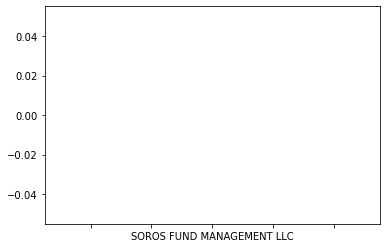

In [436]:
# Calculate rolling standard deviation

daily_std_rolling = daily_std.rolling(window=21).mean()
daily_std_rolling.plot()

# Plot rolling standard deviation

# ERROR - why is nothing appearing?

### Calculate and plot the correlation

<AxesSubplot:>

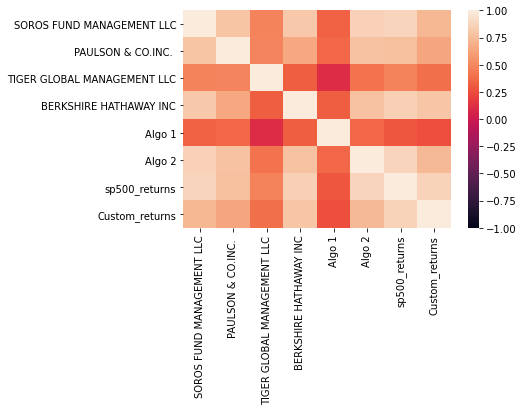

In [450]:
# Calculate the correlation
correlation = df_combined_daily.corr()

# Display de correlation matrix
sns.heatmap(correlation, vmin=-1, vmax=1)

### Calculate and Plot Rolling 60-day Beta for Your Portfolio compared to the S&P 500

<AxesSubplot:title={'center':'Rolling Beta of Custom Portfolio vs S&P500'}, xlabel='Date'>

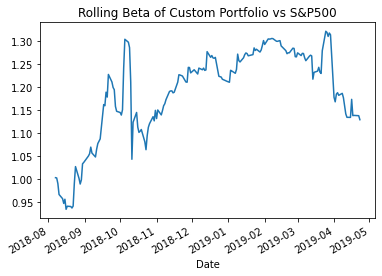

In [437]:
# Calculate and plot Beta
rolling_covariance_custom = df_combined_daily['Custom_returns'].rolling(window=60).cov(df_combined_daily['sp500_returns'])
rolling_variance_custom = df_combined_daily['sp500_returns'].rolling(window=60).var()
rolling_beta_custom = rolling_covariance_custom / rolling_variance_custom

# Plot beta trend

rolling_beta_custom.plot(title ='Rolling Beta of Custom Portfolio vs S&P500')

### Using the daily returns, calculate and visualize the Sharpe ratios using a bar plot

In [447]:
# Calculate Annualzied Sharpe Ratios

annual_sharpe_custom = (df_combined_daily.mean() * 252) / (df_combined_daily.std() * np.sqrt(252))

In [448]:
annual_sharpe_custom

SOROS FUND MANAGEMENT LLC      0.430713
PAULSON & CO.INC.              0.258738
TIGER GLOBAL MANAGEMENT LLC   -1.034216
BERKSHIRE HATHAWAY INC         0.159756
Algo 1                         2.035665
Algo 2                         0.080607
sp500_returns                  0.584820
Custom_returns                 0.933123
dtype: float64

<AxesSubplot:>

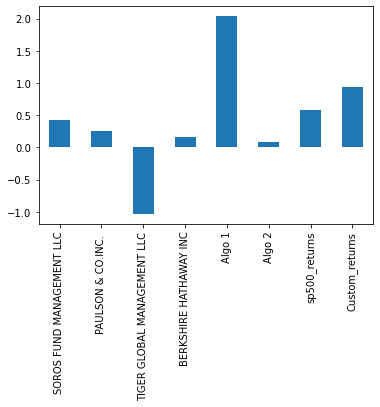

In [449]:
# Visualize the sharpe ratios as a bar plot
annual_sharpe_custom.plot(kind="bar")

### How does your portfolio do?

The custom portofolio beats the S&P500 ! But does not beat Algo1... 
With a higher standard deviation, the volatility of this custom portfolio is higher. The risk 
The Sharpe ratio is lower, as a result our custom portfolio has a lower return vs risk compared to Algo1. The risk vs return is better compared to S&P500, so our custom portfolio is a better investment.